# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [50]:
RANDOM_STATE = 42

Загрузим данные.

In [90]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [52]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,Wheadon; Mr. Edward H,male,66.0,0,0,C.A. 24579,10.5000,NaN,S
753,754,0,3,Jonkoff; Mr. Lalio,male,23.0,0,0,349204,7.8958,NaN,S
267,268,1,3,Persson; Mr. Ernst Ulrik,male,25.0,1,0,347083,7.7750,NaN,S
605,606,0,3,Lindell; Mr. Edvard Bengtsson,male,36.0,1,0,349910,15.5500,NaN,S
626,627,0,2,Kirkland; Rev. Charles Leonard,male,57.0,0,0,219533,12.3500,NaN,Q


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [88]:
# ваш код здесь
Data.shape 

(891, 12)

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [92]:
Data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,3,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,Braund; Mr. Owen Harris,male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,574,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [87]:
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


**Вопрос:** в скольких категориальных колонках есть пропуски?

### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [57]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [58]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [59]:
# ваш код здесь
Data['Sex'].value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [93]:
# ваш код здесь
Data['Sex'] = Data['Sex'].map({'male':1, 'female':0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [94]:
Data['Sex'].sum()

574.0

In [62]:
# ваш код здесь
Data['Sex'].count()

886

Посмотрим, как влияет пол на выживаемость.

In [63]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer', hue)
plt.title('Sex - Survived')
plt.show();

SyntaxError: positional argument follows keyword argument (793326962.py, line 1)

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

In [95]:
len(Data.columns)

12

In [ ]:
Data['Pclass'].value_counts()
Data['Pclass'].unique()

array([3, 1, 2])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

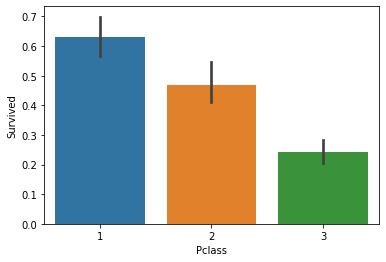

In [ ]:
# ваш код здесь
Data.columns

sns.barplot(x='Pclass', y='Survived', data=Data)

**Вопрос:** пассажиры из какого класса выживали чаще всего?

In [ ]:
1

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

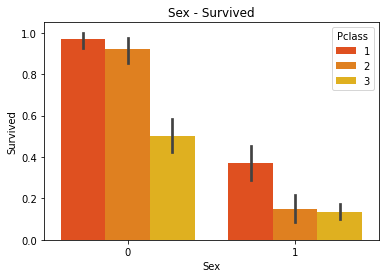

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [ ]:
# ваш код здесь
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [76]:
# ваш код здесь
Data.drop(columns=['Embarked'], inplace=True) 


/var/folders/28/sfq_hns161j8ppvs2qwgz6xw0000gn/T/ipykernel_41287/4160176355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns=['Embarked'], inplace=True)


### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [ ]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

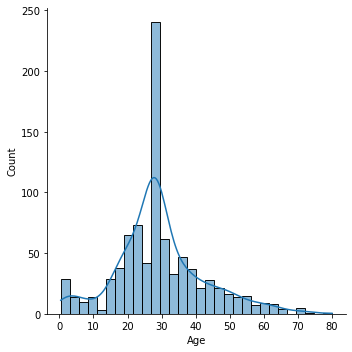

In [ ]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

<AxesSubplot:>

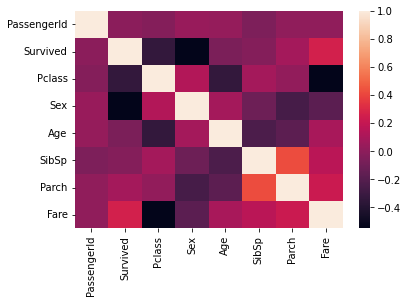

In [ ]:
Data.corr()
sns.heatmap(Data.corr())

In [67]:
# ваш код здесь
Data.drop(columns=['Fare'], inplace=True)

/var/folders/28/sfq_hns161j8ppvs2qwgz6xw0000gn/T/ipykernel_41287/4176139608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns=['Fare'], inplace=True)


**Вопрос:** сколько на данный момент колонок в таблице `Data`?

In [75]:
len(Data.columns)

7

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [73]:
# ваш код здесь
Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)

/var/folders/28/sfq_hns161j8ppvs2qwgz6xw0000gn/T/ipykernel_41287/2177867133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)


После минимальной обработки данных у нас получилась следующая таблица:

In [77]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [79]:
# ваш код здесь
Data.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338447,-0.545547,-0.074456,-0.033743,0.085753
Pclass,-0.338447,1.000000,0.133972,-0.371557,0.083148,0.015606
Sex,-0.545547,0.133972,1.000000,0.093720,-0.114677,-0.259232
Age,-0.074456,-0.371557,0.093720,1.000000,-0.310941,-0.194481
SibSp,-0.033743,0.083148,-0.114677,-0.310941,1.000000,0.422104
Parch,0.085753,0.015606,-0.259232,-0.194481,0.422104,1.000000


<AxesSubplot:>

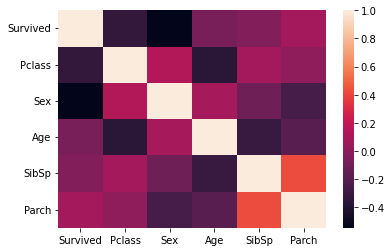

In [80]:
sns.heatmap(Data.corr())

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

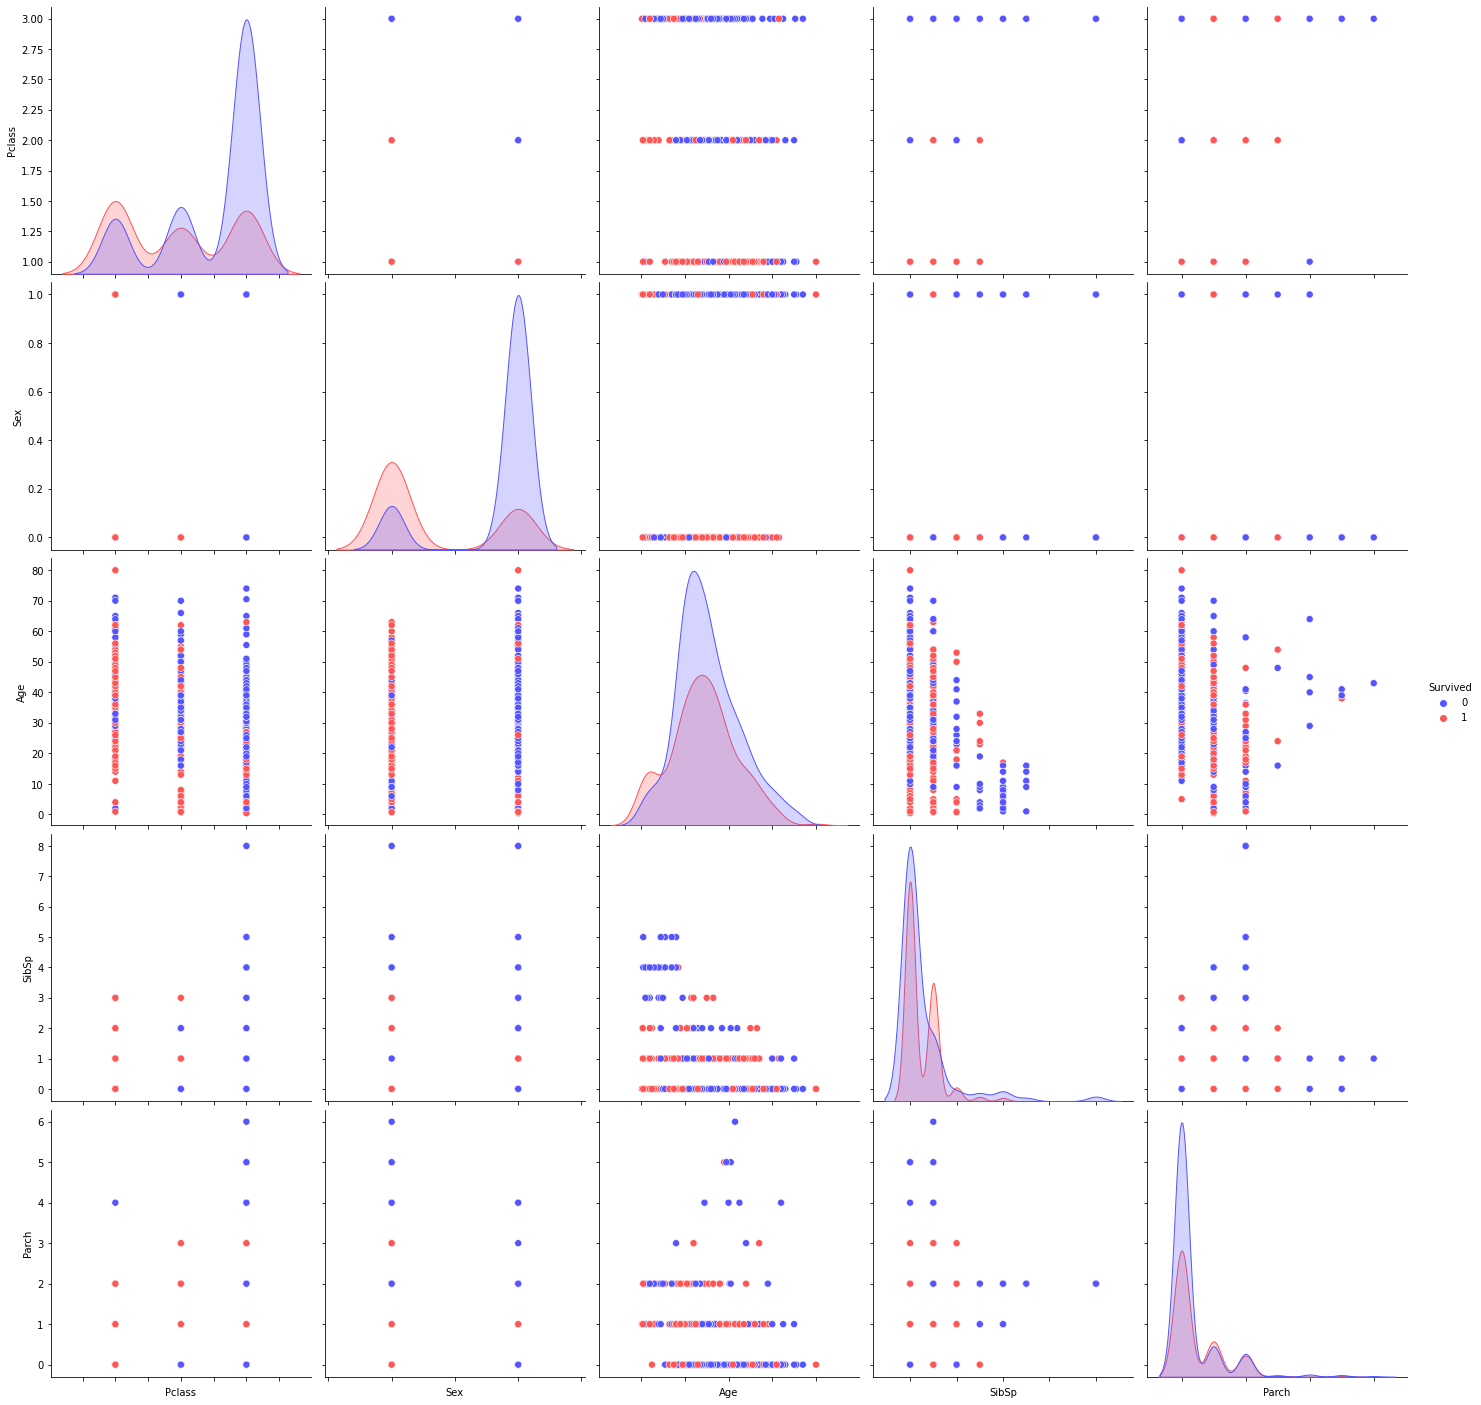

In [81]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [ ]:
# ваш код здесь

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [ ]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [82]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [83]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7878103837471784